# **<font size="7">` Dependencies (must to run)`</font>**

___

In [1]:
import sys, os, copy
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == 'darwin' :
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

'main root'
main_path = os.path.abspath('../')
ds_root_path =  os.path.join(os.path.abspath('../..'),"ML_DataSet")
sys.path.append(main_path)
import tensorflow as tf
from lib.utils.common import is_path_avaiable
from lib.visualization import Vis_PoseSampleTransform, Vis_PoseSampleTopdownAffine

'basic info'
print(" tensorflow version:",tf.__version__)
print(" numpy version:", np.__version__)
print(" Python version:", sys.version)
print(" sys.platform:", sys.platform)
print(" gpu available:", tf.config.list_physical_devices('GPU'))
print(" sys.path:", sys.path)
is_path_avaiable(ds_root_path)
is_path_avaiable(main_path) 

if  sys.platform == 'win32':
    'xla issue : https://www.qiniu.com/qfans/qnso-68614547#comments'
    #libdevice_path = "C:/Users/yista/anaconda3/envs/rtx_py38_tf2-10_cu118/Library/bin"
    #os.environ['XLA_FLAGS'] = "--xla_gpu_cuda_data_dir=C:/Users/yista/anaconda3/envs/rtx_py38_tf2-10_cu118/Library/bin"
    libdevice_path = "C:/Users/yista/anaconda3/envs/rtx_py38_tf2-10_cu118/Library/bin"
    is_path_avaiable(libdevice_path)
    os.environ['XLA_FLAGS'] = "--xla_gpu_cuda_data_dir="+libdevice_path
    print(os.environ['XLA_FLAGS'])

key : BBoxesFormatTransform, value :<class 'lib.datasets.transforms.bboxes_format_transform.BBoxesFormatTransform'> >
key : ImageResize, value :<class 'lib.datasets.transforms.img_resize.ImageResize'> >
key : ImgPadResize, value :<class 'lib.datasets.transforms.img_resize.ImgPadResize'> >
key : Albumentations, value :<class 'lib.datasets.transforms.albumentations.Albumentations'> >
key : IdendityTest, value :<class 'lib.datasets.transforms.idendity_test.IdendityTest'> >
key : EnsureTensor, value :<class 'lib.datasets.transforms.ensure_to_tensor.EnsureTensor'> >
key : ImageNormalize, value :<class 'lib.datasets.transforms.img_norm.ImageNormalize'> >
key : RandomBBoxTransform, value :<class 'lib.datasets.transforms.random_bbox_transform.RandomBBoxTransform'> >
key : RandomFlip, value :<class 'lib.datasets.transforms.random_flip.RandomFlip'> >
key : RandomChannelShift, value :<class 'lib.datasets.transforms.random_channel_shift.RandomChannelShift'> >
key : RandomContrast, value :<class 'l

c:\Users\yista\anaconda3\envs\rtx_py38_tf2-10_cu118\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


key : dataloader, value :<class 'lib.datasets.tfds_builder.dataloader'> >
key : Parser_CocoSinglePoseTFRec_CocoPoseStyle, value :<class 'lib.datasets.tfrec_parsers.coco_dataset.Parser_CocoSinglePoseTFRec_CocoPoseStyle'> >
key : Parser_CocoMultiPoseTFRec_CocoPoseStyle, value :<class 'lib.datasets.tfrec_parsers.coco_dataset.Parser_CocoMultiPoseTFRec_CocoPoseStyle'> >
key : Parser_CocoMultiPoseTFRec_CocoDetStyle, value :<class 'lib.datasets.tfrec_parsers.coco_dataset.Parser_CocoMultiPoseTFRec_CocoDetStyle'> >
key : Parser_AicTopdownTFRec_CocoPoseStyle, value :<class 'lib.datasets.tfrec_parsers.aic_dataset.Parser_AicTopdownTFRec_CocoPoseStyle'> >
 tensorflow version: 2.10.0
 numpy version: 1.24.3
 Python version: 3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]
 sys.platform: win32
 gpu available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
 sys.path: ['h:\\deep_learning\\project_sample_V0.7\\tasks', 'c:\\Users\\yista\\anaconda3\\envs\\rtx_py38_tf2

### **<font size="6">`HyperParams`</font>**

In [2]:
'MODEL Type'
MODEL_TYPE = 'mvla_pose'
PROJECT_NAME = 'RSN'
MODEL_INPUT_SIZE_HW = (256,192)
MODEL_INPUT_SIZE_WH = MODEL_INPUT_SIZE_HW[::-1]
'Model Extra Settings'
RSN_STAGES = 4

'Golbal Settings'
USE_MIXED_PRECISION = True if sys.platform != 'darwin' else False
BATCH_SIZE = 32
PREFETCH_SIZE = 4
BATCH_NORM_EPSILON = 1e-5  #torch  :  bn_eps = 1e-5,  tensorflow : bn_eps = 1e-3
BATCH_NORM_MOMENTUM = 0.9  #torch  :  bn_moentum = 0.9,  tensorflow : bn_moentum = 0.99
CODEC_PARALLEL_ITERS = BATCH_SIZE  #parallel_iterations
CV_TRANS_PARALLEL_ITERS = BATCH_SIZE  #parallel_iterations
'Training'
TOTAL_EPOCHS = 200
WARMUP_EPOCHS = TOTAL_EPOCHS//10
LR = 1e-3
"path"
PATH_BACKBONE_FEATURE_VEC = None
PATH_TO_SAVE_MODEL = None
PATH_TO_SAVE_EMA_MODEL = None
PATH_TO_LOAD_MODEL = None
PATH_TO_LOAD_EMA_MODEL= None

## **<font size="6">`Mixed Precision (Optional)`</font>**

In [3]:
from tensorflow.keras import mixed_precision
if USE_MIXED_PRECISION :
    policy = mixed_precision.Policy('mixed_float16')
else:
    policy = mixed_precision.Policy('float32')
mixed_precision.set_global_policy(policy)
print('Compute dtype: %s' % policy.compute_dtype)
print('Variable dtype: %s' % policy.variable_dtype)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3070 Laptop GPU, compute capability 8.6
Compute dtype: float16
Variable dtype: float32


## **<font size="6">`Data Paths`</font>**

In [6]:
'dataset root'
ds_main_path =  os.path.join(ds_root_path,"COCO-WholeBody")
is_path_avaiable(ds_main_path)

'train/ val dataset path'
val_tfrec_kps_dir = os.path.join(ds_main_path, "tfrecords_kps_val")
'verify whether tfrecords_dir is exist'
is_path_avaiable(val_tfrec_kps_dir)

'train/ val dataset path'
train_tfrec_kps_dir = os.path.join(ds_main_path, "tfrecords_kps_train")
'verify whether tfrecords_dir is exist'
is_path_avaiable(train_tfrec_kps_dir)

'pretrained model lib'
lib_main_path =  os.path.join(os.path.abspath('../..'),"trained")
is_path_avaiable(lib_main_path)

successfully connect floder  : 
h:\deep_learning\ML_DataSet\COCO-WholeBody

successfully connect floder  : 
h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_val

successfully connect floder  : 
h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train

successfully connect floder  : 
h:\deep_learning\trained



True

# **<font size="7">` 1. Build DataLoader`</font>**

## **<font size="6">`1-1. Train data pipeline `</font>**

register : <tfds_pipeline>  init ...................from internal libs


 All Modules of registry < tfds_pipeline >have been automatically imported from lib.datasets

--------------register : <tfds_pipeline>  Update Done-----from internal libs

successfully connect floder  : 
h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train



h:\deep_learning\project_sample_V0.7\lib\datasets\tfds_builder.py:86: UserWarning: codec is None, you cannot gen targets used in traaining, but test_mode to review data is ok @pose_dataloader
  warnings.warn("codec is None, you cannot gen targets used in traaining, but test_mode to review data is ok @pose_dataloader")


samples_in_tfrec : 4269 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_00-4269.tfrec>
samples_in_tfrec : 2899 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_01-2899.tfrec>
samples_in_tfrec : 3523 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_02-3523.tfrec>
samples_in_tfrec : 4124 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_03-4124.tfrec>
samples_in_tfrec : 4701 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_04-4701.tfrec>
samples_in_tfrec : 5047 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_05-5047.tfrec>
samples_in_tfrec : 5178 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_06-5178.tfrec>
samples_in_tfrec : 4789 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_07-4789.tfrec>
samples_in_tfrec : 3984 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_train\file_08-3984.tfrec>
samples_in

h:\deep_learning\project_sample_V0.7\lib\datasets\tfds_builder.py:226: UserWarning: test_mode cannot support training !!!!!!!!!! @pose_dataloader
  warnings.warn("test_mode cannot support training !!!!!!!!!! @pose_dataloader")



 ----------------pipeline_cfg  (< ith > --- key : value)  -------------------
< 1 >  --- IdendityTest : <lib.datasets.transforms.idendity_test.IdendityTest object at 0x000001F98ACEE880>
< 2 >  --- RandomFlip : <lib.datasets.transforms.random_flip.RandomFlip object at 0x000001F98ACEE610>
< 3 >  --- RandomHalfBody : <lib.datasets.transforms.random_half_body.RandomHalfBody object at 0x000001F98ACEE400>
< 4 >  --- RandomKPSDropout : <lib.datasets.transforms.random_kps_dropout.RandomKPSDropout object at 0x000001F98ACEE9A0>
< 5 >  --- RandomGaussianBlur : <lib.datasets.transforms.random_gaussian_blur.RandomGaussianBlur object at 0x000001F98ACEE5E0>
< 6 >  --- TopdownAffine : <lib.datasets.transforms.topdown_transforms.TopdownAffine object at 0x000001F98ACEE7C0>
< 7 >  --- EnsureTensor : <lib.datasets.transforms.ensure_to_tensor.EnsureTensor object at 0x000001F98ACEEF10>
< 8 >  --- DataAdapter : <function dataloader.GenerateTargets.<locals>.<lambda> at 0x000001F9BCABBCA0>
-------------------

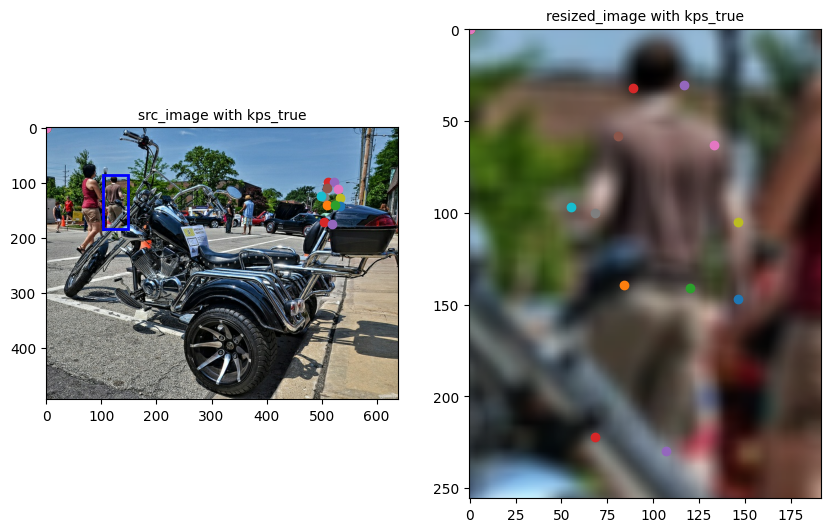

In [7]:
import copy
from lib.Registers import DATASETS
from lib.datasets.transforms import PackInputTensorTypeSpec

tfrec_train_dataset_cfg = dict(
    type = 'Parser_CocoSinglePoseTFRec_CocoPoseStyle', 
    data_root = train_tfrec_kps_dir,
)
IdendityTest_cfg = dict(type='IdendityTest')
flip_cfg = dict(type='RandomFlip',prob=0.5)

halfbody_cfg = dict(
    type='RandomHalfBody',
    prob=0.5, 
    upper_prioritized_prob= 0.7,
    padding = 1.5,
    min_total_keypoints = 9, 
    min_upper_keypoints = 4,
    min_lower_keypoints = 4
)

bbox_cfg = dict(
    type='RandomBBoxTransform',  
    shift_factor = 0.16, 
    shift_prob = 0.5, 
    scale_factor = (0.75, 1.25), 
    scale_prob = 0.5 ,
)


contrast_cfg = dict(
    type = 'RandomContrast',
    value_range =(0,255), 
    factor =(0.3, 0.8),
    prob = 0.5,
    test_mode=False
)
hsv_cfg = dict(
    type='RandomHSVAug',  
    hue_prob = 0.5,
    saturation_prob = 0.5,
    brightness_prob = 0.5,
    hue_delta = 0.3, 
    saturation_factor = (0.5,2.0),
    brightness_delta = 0.4
)

blur_cfg = dict(
    type='RandomGaussianBlur', 
    kernel_size_xy=(5,5),
    factor=3.0,
    prob =0.5,
    test_mode=True
)
kpsdrop_cfg = dict(
    type='RandomKPSDropout',   
    base_mask_ratio = 0.05,
    mask_scale_factor = (0.8, 1.2),
    min_bbox_area = 64.*64.,
    prob=0.2, 
    drop_joints_indices=[5,6,7,8,11,12],
    random_mask_color=False, 
    test_mode =False
)
affine_cfg = dict(
    type='TopdownAffine',
    is_train = True, 
    test_mode = False,   
    do_clip = True,      
    keep_bbox_aspect_prob = 0.5,
    rotate_prob = 0.5,
    shear_prob = 0.25,
    MaxRot_deg=30., 
    MaxShear_deg=15.
)


train_dataloader_cfg =  dict(
    type = 'dataloader',
    batch_size = BATCH_SIZE,
    prefetch_size = PREFETCH_SIZE,
    shuffle  =  True,
    tfrec_datasets_list = [tfrec_train_dataset_cfg],
    augmenters = [IdendityTest_cfg, flip_cfg, halfbody_cfg, kpsdrop_cfg, blur_cfg, affine_cfg],
    codec = None,
    ensure_to_tensor = True,
    parallel_iterations = CV_TRANS_PARALLEL_ITERS
)


train_tfds_builder = DATASETS.build(copy.deepcopy(train_dataloader_cfg))
batch_train_dataset = train_tfds_builder.GenerateTargets(
    test_mode=True, 
    unpack_x_y_sample_weight= False, 
    ds_weights =None)

train_tfds_builder.get_pipeline_cfg() 



batch_id = 9
for data in batch_train_dataset.take(1):
    print(data.keys())
    print( data['bbox_format'])
    print( data['meta_info'].keys())
    #box_src_format, _ = tf.unique( tf.reshape( data['bbox_format'],(-1)) )
 
    reszied_images = data['image']
    bboxes = data['bbox']
    kps_true = data['kps']
    print(kps_true[batch_id])

    src_images = data['meta_info']['src_image']
    src_kps = tf.reshape( data['meta_info']['src_keypoints'],[-1,17,3])
    src_bboxes = data['meta_info']['src_bbox']

    #print(src_kps)
    plt.figure(figsize=(10,15))
    'crop image' 
    plt.subplot(1,2,1)
    ax = plt.gca()
    src_image = src_images[batch_id,...]
    src_bbox = src_bboxes[batch_id,:]
    src_image = tf.cast(src_image, dtype=tf.uint8)
    plt.title('src_image with kps_true',fontsize= 10)
    for i in range(0,src_kps.shape[1]):
        kps_x = int((src_kps[batch_id,i,0]))
        kps_y = int((src_kps[batch_id,i,1]))
        plt.scatter(kps_x,kps_y)
    x1, y1, w, h = src_bbox
    patch = plt.Rectangle([x1, y1], w, h, fill=False, edgecolor=[0, 0, 1], linewidth=2)
    ax.add_patch(patch)
    plt.imshow(src_image.numpy())

    plt.subplot(1,2,2)
    image = reszied_images[batch_id]
    image = tf.cast(image, dtype=tf.uint8)
    plt.title('resized_image with kps_true', fontsize= 10)
    for i in range(0,kps_true.shape[1]):
        kps_x = int((kps_true[batch_id,i,0]))
        kps_y = int((kps_true[batch_id,i,1]))
        plt.scatter(kps_x,kps_y)
    plt.imshow(image.numpy())

In [ ]:
train_tfds_builder.pipeline.transforms_dict['TopdownAffine'].parallel_iterations

## **<font size="6">`1-2. Val data pipeline`</font>**

successfully connect floder  : 
h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_val

samples_in_tfrec : 1880 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_val\file_00-1880.tfrec>
samples_in_tfrec : 2425 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_val\file_01-2425.tfrec>
samples_in_tfrec : 1342 @ <h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_val\file_02-1342.tfrec>
num_TotalSamples: 5647
successfully connect floder  : 
h:\deep_learning\ML_DataSet\COCO-WholeBody\tfrecords_kps_val


 ----------------pipeline_cfg  (< ith > --- key : value)  -------------------
< 1 >  --- TopdownAffine : <lib.datasets.transforms.topdown_transforms.TopdownAffine object at 0x000001FA0C918550>
< 2 >  --- EnsureTensor : <lib.datasets.transforms.ensure_to_tensor.EnsureTensor object at 0x000001FA0C918070>
< 3 >  --- DataAdapter : <function dataloader.GenerateTargets.<locals>.<lambda> at 0x000001F9BCC0A550>
---------------------------------------------------------

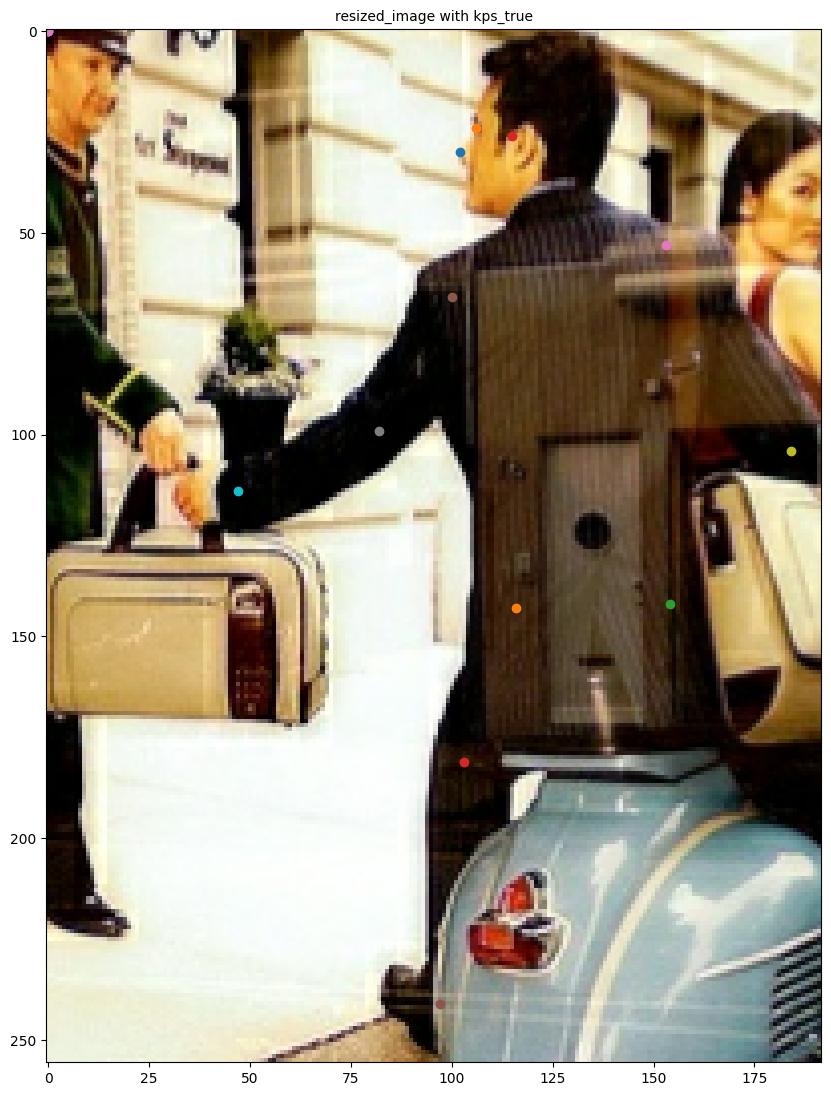

In [8]:
tfrec_val_dataset_cfg = dict(
    type = 'Parser_CocoSinglePoseTFRec_CocoPoseStyle', 
    data_root = val_tfrec_kps_dir,
)
val_affine_cfg = dict(
    type='TopdownAffine',
    is_train = False, 
    test_mode = False,   
    do_clip = True,      
    keep_bbox_aspect_prob = 1.,
    rotate_prob = 0.,
    shear_prob = 0.,
    MaxRot_deg=0., 
    MaxShear_deg=0.
)

val_dataloader_cfg =  dict(
    type = 'dataloader',
    batch_size = BATCH_SIZE,
    prefetch_size = PREFETCH_SIZE,
    shuffle  =  False,
    tfrec_datasets_list = [tfrec_val_dataset_cfg],
    augmenters = [val_affine_cfg],
    codec = None,
    ensure_to_tensor = True
)

val_tfds_builder = DATASETS.build(
    copy.deepcopy(val_dataloader_cfg)
)
batch_val_dataset = val_tfds_builder.GenerateTargets(
    test_mode=False,     
    unpack_x_y_sample_weight= False, 
    ds_weights =None)
val_tfds_builder.get_pipeline_cfg() 
for data in batch_val_dataset.take(1):
    TensorSpec = PackInputTensorTypeSpec(data,{})
    print(f"img_size : {reszied_images[batch_id].shape}")
    #print(data.keys())
    #print( data['bbox_format'])
    #box_src_format, _ = tf.unique( tf.reshape( data['bbox_format'],(-1)) )
    reszied_images = data['image']
    bboxes = data['bbox']
    kps_true = data['kps']
    print(kps_true[batch_id])
    print(f"img_size : {reszied_images[batch_id].shape}")
    #print(src_kps)
    plt.figure(figsize=(10,15))
    image = reszied_images[batch_id]
    image = tf.cast(image, dtype=tf.uint8)
    plt.title('resized_image with kps_true', fontsize= 10)
    for i in range(0,kps_true.shape[1]):
        kps_x = int((kps_true[batch_id,i,0]))
        kps_y = int((kps_true[batch_id,i,1]))
        plt.scatter(kps_x,kps_y)
    plt.imshow(image.numpy())

#  **<font size="7">`2. Model`</font>**

##  **<font size="6">`2-1. BackBone`</font>**

In [5]:
from lib.models.builder import build_backbone
'CSPNeXt-m'
rsn_cfg = dict(
    type = 'ResidualStepsNetwork',
    model_input_shape=(256,192),
    num_stages = 4,
    num_units  =4,
    num_blocks = [2, 2, 2, 2],
    num_steps=4,
    res_top_channels  = 64,
    expand_times  = 26,
    use_depthwise  = False,
    bn_epsilon = 1e-5,
    bn_momentum = 0.9,
    activation = 'silu',    
    data_preprocessor = dict(
        type='ImgNormalization', 
        img_mean = [0.485, 0.456, 0.406],  
        img_std = [0.229, 0.224, 0.225]
    ),
    deploy = None,
    name = '4XRSN18'
)

model = build_backbone(rsn_cfg)
model.summary(200)
model.output

Model: "4XRSN18"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 input_2 (InputLayer)                                             [(None, 256, 192, 3)]                       0                       []                                                                
                                                                                                                                                                                                        
 img_normalization_1 (ImgNormalization)                           (None, 256, 192, 3)                         0                       ['input_2[0][0]']                            

[[<KerasTensor: shape=(None, 64, 48, 256) dtype=float16 (created by layer 'Stage0_RSN_Up_P2_out_relu')>,
  <KerasTensor: shape=(None, 32, 24, 256) dtype=float16 (created by layer 'Stage0_RSN_Up_P3_out_relu')>,
  <KerasTensor: shape=(None, 16, 12, 256) dtype=float16 (created by layer 'Stage0_RSN_Up_P4_out_relu')>,
  <KerasTensor: shape=(None, 8, 6, 256) dtype=float16 (created by layer 'Stage0_RSN_Up_P5_out_relu')>],
 [<KerasTensor: shape=(None, 64, 48, 256) dtype=float16 (created by layer 'Stage1_RSN_Up_P2_out_relu')>,
  <KerasTensor: shape=(None, 32, 24, 256) dtype=float16 (created by layer 'Stage1_RSN_Up_P3_out_relu')>,
  <KerasTensor: shape=(None, 16, 12, 256) dtype=float16 (created by layer 'Stage1_RSN_Up_P4_out_relu')>,
  <KerasTensor: shape=(None, 8, 6, 256) dtype=float16 (created by layer 'Stage1_RSN_Up_P5_out_relu')>],
 [<KerasTensor: shape=(None, 64, 48, 256) dtype=float16 (created by layer 'Stage2_RSN_Up_P2_out_relu')>,
  <KerasTensor: shape=(None, 32, 24, 256) dtype=float16 (

In [15]:
type( model.outputs[0] )

keras.engine.keras_tensor.KerasTensor

In [16]:
# model.output
# tf.keras.backend.is_keras_tensor(model.output)


from keras import backend as K
from keras.engine.keras_tensor import KerasTensor
isinstance(model.outputs[0], KerasTensor)

True

##  **<font size="6">`2-2. with Multi Heatmap head`</font>**

In [6]:
#from lib.Registers import MODELS
from lib.models import BaseModel

rsn_cfg = dict(
    type = 'ResidualStepsNetwork',
    model_input_shape=(256,192),
    num_stages = RSN_STAGES,
    num_units  =4,
    num_blocks = [2, 2, 2, 2],
    num_steps=4,
    res_top_channels  = 64,
    expand_times  = 26,
    use_depthwise  = False,
    bn_epsilon = BATCH_NORM_EPSILON,
    bn_momentum = BATCH_NORM_MOMENTUM,
    activation = 'relu',    
    data_preprocessor = dict(
            type='ImgNormalization', 
            img_mean = [0.485, 0.456, 0.406],  
            img_std = [0.229, 0.224, 0.225]
    ),
    deploy = None,
    name = '4XRSN18'
)


mspn_head_cfg = dict(
    type ='MSPNHead',
    num_stages = 4,
    prim_head_index  = 0,
    aux_heads_indices = [1,2,3],
    use_prm = True,
    out_shape = (64,48),
    out_channels = 17,
    prim_deconv_filters_list  = [],
    prim_deconv_kernels_list  = [],
    prim_conv_kernel_size = None,
    prim_conv_out_channels  = None,
    aux_interpolation  = 'bilinear',
    aux_conv_kernel_size  = 3,
    activation  ="relu", 
    bn_epsilon = BATCH_NORM_EPSILON,
    bn_momentum = BATCH_NORM_MOMENTUM,
)   


Optimzer_cfg = dict(
    type="Adam", 
    learning_rate=5e-3,
)

Loss_cfg_list = [  
    dict(
        type = 'MultiHeatmapMSELoss',
        num_joints = 17,
        num_levels = 4, 
        use_ohkm = True if i!=3 else False, 
        ohkm_top_k = 8,
        ohkm_level_index = 0,
        joints_balance_weights = [1., 1., 1., 1., 1., 1., 1., 1.2, 1.2,
                                  1.5, 1.5, 1., 1., 1.2, 1.2, 1.5, 1.5],
        level_balance_weights  = [4 if i!=3 else 1., 1.,1.,1.], 
        loss_weight = 1.                   
    ) for i in range(RSN_STAGES)
]    

Loss_cfg_list = [  
    dict(
        type = 'MultiHeatmapMSELoss',
        num_joints = 17,
        num_levels = 4, 
        use_ohkm = False if i!=3 else False, 
        ohkm_top_k = 8,
        ohkm_level_index = 0,
        joints_balance_weights = [1., 1., 1., 1., 1., 1., 1., 1.2, 1.2,
                                  1.5, 1.5, 1., 1., 1.2, 1.2, 1.5, 1.5],
        level_balance_weights  = [1., 1.,1.,1.], 
        loss_weight = 1.                   
    ) for i in range(RSN_STAGES)
]    


Metric_cfg =  [ 
    dict(
        type = 'PCKMetric',
        tf_dists = 0.5, 
        num_kps = 17,
        hm_thr= [0.75, 0.75, 0.75, 0.75, 0.75,
                0.25, 0.25, 0.25, 0.25, 0.25,
                0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]            
    )
]

codec_cfg = dict(   
    type = 'Multi_MSRAHeatmapCodec',
    use_udp = True,
    num_kps  =17, 
    sigmas  = [2, 3, 4, 5],
    target_size_xy  = (192,256), 
    heatmap_size_xy  = (48, 64),
    stack_multi_hm  = True,
    hm_thr= tf.concat(
        [tf.ones(shape=(5,), dtype=tf.float32)*0.75, tf.ones(shape=(12,), dtype=tf.float32)*0.5], 
        axis=-1
    ),
    use_vectorized_map  = False,
    parallel_iterations  = CODEC_PARALLEL_ITERS,
)


model = BaseModel(
    backbone = rsn_cfg,
    neck  = None,
    head  = mspn_head_cfg,
    extract_layres = [],
    codec = codec_cfg,
    optimizer = Optimzer_cfg,
    losses  = Loss_cfg_list,
    metrics  = Metric_cfg, 
    name = '4XRSN18'
)

model.output_names


register : <loss>  init ...................from internal libs

key : KLDiscretLoss, value :<class 'lib.losses.simcc_loss.KLDiscretLoss'> >
key : YoloAnchorFreeBBoxLoss, value :<class 'lib.losses.obj_det_loss.YoloAnchorFreeBBoxLoss'> >
key : YoloAnchorFreeClassLoss, value :<class 'lib.losses.obj_det_loss.YoloAnchorFreeClassLoss'> >
key : yolo_loss, value :<class 'lib.losses.obj_det_loss.yolo_loss'> >
key : KeypointsMSELoss, value :<class 'lib.losses.heatmap_loss.KeypointsMSELoss'> >
key : MultiHeatmapMSELoss, value :<class 'lib.losses.heatmap_loss.MultiHeatmapMSELoss'> >
key : PoseLifterRegLoss, value :<class 'lib.losses.lifter_loss.PoseLifterRegLoss'> >

 All Modules of registry < loss >have been automatically imported from lib.losses

--------------register : <loss>  Update Done-----from internal libs

register : <metric>  init ...................from internal libs

key : PCKMetric, value :<class 'lib.metrics.pose_metrics.PCKMetric'> >
key : SimCC_PCKMetric, value :<class 'lib.metrics

['MSPNHead_Stage1_out',
 'MSPNHead_Stage2_out',
 'MSPNHead_Stage3_out',
 'MSPNHead_Stage4_out']

In [7]:
model.output
#model.summary(200)

[<KerasTensor: shape=(None, 4, 64, 48, 17) dtype=float32 (created by layer 'MSPNHead_Stage1_out')>,
 <KerasTensor: shape=(None, 4, 64, 48, 17) dtype=float32 (created by layer 'MSPNHead_Stage2_out')>,
 <KerasTensor: shape=(None, 4, 64, 48, 17) dtype=float32 (created by layer 'MSPNHead_Stage3_out')>,
 <KerasTensor: shape=(None, 4, 64, 48, 17) dtype=float32 (created by layer 'MSPNHead_Stage4_out')>]

## **<font size="6">` 2-3. Load Model Weights`</font>**

In [ ]:
model_type= 'mvla_pose'
project_name = 'RSN'
h5_file_name = 'td-hm_RSN18_udp-b64-200e_coco-256x192.h5'
file_path = os.path.join(lib_main_path,model_type,project_name,h5_file_name)
is_path_avaiable(file_path)
model.load_weights(file_path)



## **<font size="6">` Training`</font>**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath = file_path,
    monitor="loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=True
)

train_steps_per_epoch = train_tfds_builder.ds_steps_per_epoch
val_steps_per_epoch = val_tfds_builder.ds_steps_per_epoch

In [16]:
history = model.fit(
    batch_train_dataset, 
    epochs = 3, 
    steps_per_epoch = 4,
)

init ModelingTask ..............
Epoch 1/3
4/4 [==============================] - 75s 961ms/step - loss: 17.0675 - MSPNHead_Stage1_out_loss: 4.2537 - MSPNHead_Stage2_out_loss: 4.2946 - MSPNHead_Stage3_out_loss: 4.2412 - MSPNHead_Stage4_out_loss: 4.2779 - MSPNHead_Stage4_out_pck_acc: 0.0000e+00
Epoch 2/3
4/4 [==============================] - 4s 925ms/step - loss: 18.0715 - MSPNHead_Stage1_out_loss: 4.4924 - MSPNHead_Stage2_out_loss: 4.5461 - MSPNHead_Stage3_out_loss: 4.4977 - MSPNHead_Stage4_out_loss: 4.5353 - MSPNHead_Stage4_out_pck_acc: 0.0000e+00
Epoch 3/3
4/4 [==============================] - 4s 954ms/step - loss: 17.4316 - MSPNHead_Stage1_out_loss: 4.3472 - MSPNHead_Stage2_out_loss: 4.3772 - MSPNHead_Stage3_out_loss: 4.3412 - MSPNHead_Stage4_out_loss: 4.3660 - MSPNHead_Stage4_out_pck_acc: 0.0000e+00


# **<font size="7">` 3. Evaluation`</font>**